# **SMOTE**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
data = pd.read_csv('impckd.csv')

In [ ]:
classes = data['class'].unique()
class_counts = data['class'].value_counts()
class_counts

1    250
0    150
Name: class, dtype: int64

In [ ]:
X = data.drop('class', axis=1)
y = data['class']
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("Original data shape:", X.shape, y.shape)
print("Resampled data shape:", X_smote.shape, y_smote.shape)

Original data shape: (400, 24) (400,)
Resampled data shape: (500, 24) (500,)


In [ ]:
X_smote
type(X_smote)

pandas.core.frame.DataFrame

In [ ]:
df3=pd.concat([x_smote,y_smote],axis=1)
df3.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
sm= df3['class'].unique()
sm_counts = df3['class'].value_counts()
sm_counts

1    250
0    250
Name: class, dtype: int64

In [ ]:
df3.to_csv("smote.csv")

# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
dataset = pd.read_csv('smote.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = LinearSVC(penalty='l1', dual=False)
svm_model.fit(X_train, y_train)

LinearSVC(dual=False, penalty='l1')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


In [ ]:
#svm with L2 penalty
svm_model1 = LinearSVC(penalty='l2', dual=False)
svm_model1.fit(X_train, y_train)
y_pred = svm_model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  99.0
Precision:  100.0
Recall:  97.82608695652173
F-measure:  98.9
AUC:  98.91
Gini coefficient:  97.83


# **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('smote.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", round(accuracy*100,2))
print("Precision: ", round(precision*100,2))
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  99.5
Precision:  98.99
F-measure:  99.49
AUC:  99.51
Gini coefficient:  99.02


# **ANN**

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("smote.csv")
df.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48.0,80.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 1s 822ms/step - loss: 0.6878 - accuracy: 0.4875
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6708 - accuracy: 0.9125
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6544 - accuracy: 0.9050
Epoch 4/50
1/1 [==============================] - 0s 10ms/step - loss: 0.6388 - accuracy: 0.8775
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6238 - accuracy: 0.8650
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6092 - accuracy: 0.8600
Epoch 7/50
1/1 [==============================] - 0s 9ms/step - loss: 0.5950 - accuracy: 0.8575
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5812 - accuracy: 0.8600
Epoch 9/50
1/1 [==============================] - 0s 10ms/step - loss: 0.5679 - accuracy: 0.8625
Epoch 10/50
1/1 [==============================] - 0s 11ms/step - loss: 0.5550 - accuracy: 0.8650
Epoch 11/50
1/1 [==============

In [ ]:
model.save("ckd.model")

In [ ]:
y_pred=model.predict(X_test)


4/4 [==============================] - 0s 2ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)


In [ ]:
for i in y_pred:
  if i<=0.5:
    y_pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  94.0
Precision:  100.0
Recall:  86.95652173913044
F-measure:  93.02
AUC:  93.48
Gini coefficient:  86.96


# **CHAID**

In [ ]:
import pandas as pd
train = pd.read_csv("smote.csv")

In [ ]:
import numpy as np
X = train.drop('class', axis=1)
y = train['class']
X = np.array(X)
y = np.array(y)

In [ ]:
import numpy as np

class Node:

    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [ ]:
class DecisionTree:

    def __init__(self, alpha=0.05, min_samples=3,max_depth=7):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)


    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)

    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))

        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])

        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2

        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)

        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2

    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()

In [ ]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
classifier = DecisionTree()

In [ ]:
classifier.fit(X_train , y_train)

<ipython-input-45-fe3e5a910934>:68: RuntimeWarning: invalid value encountered in true_divide
  chi2 = np.sum((observed - expected) ** 2 / expected)


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy*100,"%")
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore)

[[76  0]
 [ 0 74]]
Accuracy 100.0 %
Recall: 1.0
Precision: 1.0
F-score: 1.0


# **C5.0**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Import Dataset
d=pd.read_csv('smote.csv')
d

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48.000000,80.000000,1.020000,1.0,0.0,0.810484,1.0,0.0,0.0,...,44.000000,7800.000000,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.000000,50.000000,1.020000,4.0,0.0,0.810484,1.0,0.0,0.0,...,38.000000,6000.000000,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.000000,80.000000,1.010000,2.0,3.0,1.000000,1.0,0.0,0.0,...,31.000000,7500.000000,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.000000,70.000000,1.005000,4.0,0.0,1.000000,0.0,1.0,0.0,...,32.000000,6700.000000,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.000000,80.000000,1.010000,2.0,0.0,1.000000,1.0,0.0,0.0,...,35.000000,7300.000000,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,47.630564,76.011756,1.021994,0.0,0.0,1.000000,1.0,0.0,0.0,...,47.208229,6700.000000,6.260705,0.0,0.0,0.0,1.0,0.0,0.0,0
496,496,25.753522,80.000000,1.024082,0.0,0.0,1.000000,1.0,0.0,0.0,...,41.550704,7218.356813,5.256995,0.0,0.0,0.0,1.0,0.0,0.0,0
497,497,45.991726,80.000000,1.020000,0.0,0.0,1.000000,1.0,0.0,0.0,...,39.916064,8404.887827,4.867260,0.0,0.0,0.0,1.0,0.0,0.0,0
498,498,53.492825,80.000000,1.025000,0.0,0.0,1.000000,1.0,0.0,0.0,...,41.753588,9100.000000,5.804067,0.0,0.0,0.0,1.0,0.0,0.0,0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   age         500 non-null    float64
 2   bp          500 non-null    float64
 3   sg          500 non-null    float64
 4   al          500 non-null    float64
 5   su          500 non-null    float64
 6   rbc         500 non-null    float64
 7   pc          500 non-null    float64
 8   pcc         500 non-null    float64
 9   ba          500 non-null    float64
 10  bgr         500 non-null    float64
 11  bu          500 non-null    float64
 12  sc          500 non-null    float64
 13  sod         500 non-null    float64
 14  pot         500 non-null    float64
 15  hemo        500 non-null    float64
 16  pcv         500 non-null    float64
 17  wbcc        500 non-null    float64
 18  rbcc        500 non-null    float64
 19  htn         500 non-null    f

In [ ]:
d['class'].unique()

array([1, 0])

In [ ]:
d['class'].value_counts()

1    250
0    250
Name: class, dtype: int64

In [ ]:
# Apply Label Encoding
le=LabelEncoder()
d['class']=le.fit_transform(d['class'])
d['class']

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: class, Length: 500, dtype: int64

In [ ]:
d['class'].value_counts()

1    250
0    250
Name: class, dtype: int64

In [ ]:
# Optionally list down column names
col_names=list(d.columns)
col_names

['Unnamed: 0',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [ ]:
d.shape

(500, 26)

In [ ]:
x=d.iloc[:,0:12]
x

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu
0,0,48.000000,80.000000,1.020000,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,36.000000
1,1,7.000000,50.000000,1.020000,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,18.000000
2,2,62.000000,80.000000,1.010000,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,53.000000
3,3,48.000000,70.000000,1.005000,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,56.000000
4,4,51.000000,80.000000,1.010000,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,26.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,47.630564,76.011756,1.021994,0.0,0.0,1.000000,1.0,0.0,0.0,100.000000,41.624687
496,496,25.753522,80.000000,1.024082,0.0,0.0,1.000000,1.0,0.0,0.0,108.797182,31.246478
497,497,45.991726,80.000000,1.020000,0.0,0.0,1.000000,1.0,0.0,0.0,95.604965,31.975177
498,498,53.492825,80.000000,1.025000,0.0,0.0,1.000000,1.0,0.0,0.0,122.765558,49.849282


In [ ]:
y=d['class']
y

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: class, Length: 500, dtype: int64

In [ ]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# C5.0 Entropy - Training the Model
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# C5.0 Entropy - Trained Model Accuracy
model_entropy.score(x_train,y_train)

1.0

[Text(0.5, 0.75, 'x[0] <= 249.5\nentropy = 1.0\nsamples = 400\nvalue = [198, 202]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 202\nvalue = [0, 202]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 198\nvalue = [198, 0]')]

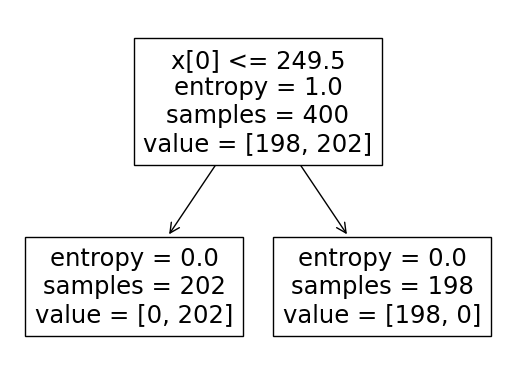

In [ ]:
# Plot the decision tree
tree.plot_tree(model_entropy)

[Text(0.5, 0.75, 'age <= 249.5\nentropy = 1.0\nsamples = 400\nvalue = [198, 202]\nclass = notckd'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 202\nvalue = [0, 202]\nclass = notckd'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 198\nvalue = [198, 0]\nclass = ckd')]

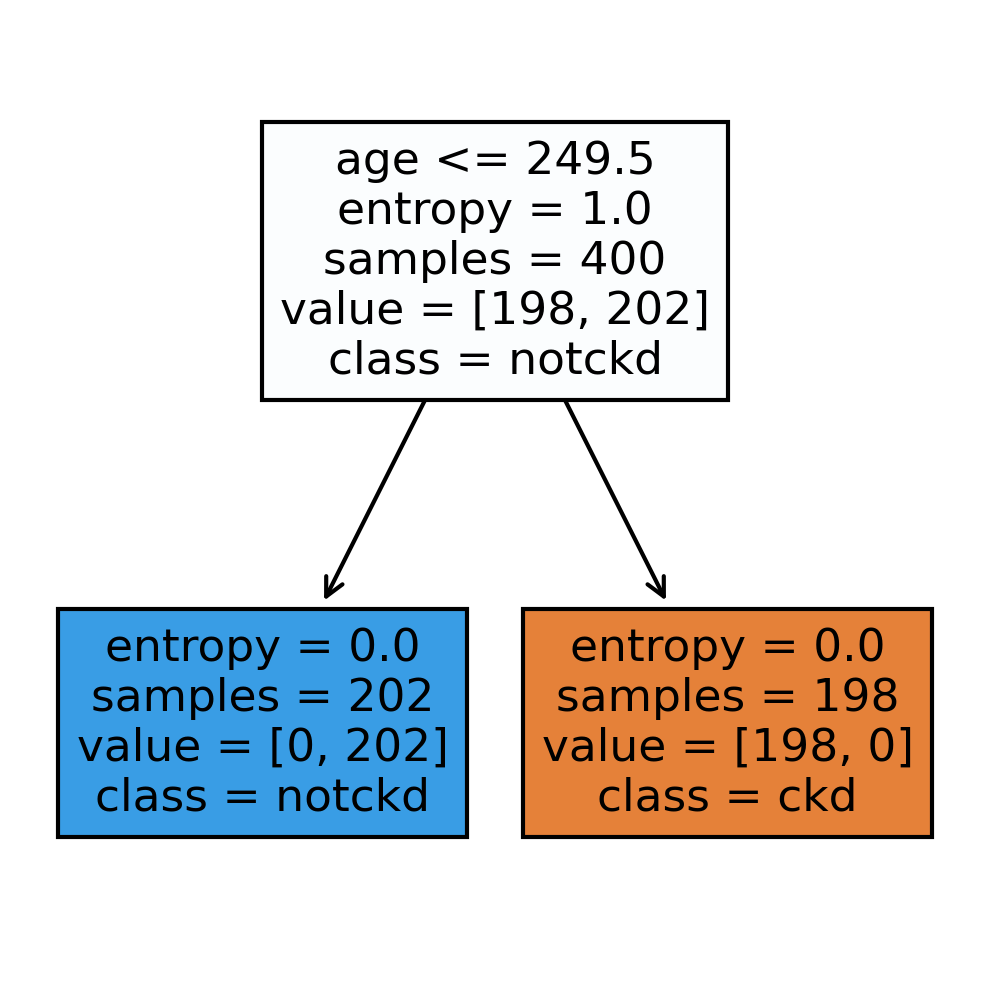

In [ ]:
# For better visualization of Decision Tree
fig=plt.figure(figsize=(4,4),dpi=300)
fn=['age', 'bp', 'sg', 'al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane', 'class']
cn=['ckd', 'notckd']
tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True)

In [ ]:
# Predicting on test data
pred=model_entropy.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
pd.Series(pred).value_counts() # For value_count of array

0    52
1    48
dtype: int64

In [ ]:
y_test.value_counts()

0    52
1    48
Name: class, dtype: int64

In [ ]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,pred)

col_0,0,1
class,,
0,52,0
1,0,48


In [ ]:
# C5.0 Entropy - Test Model Accuracy
acc = model_entropy.score(x_test,y_test)

In [ ]:
print("Accuracy : ",acc*100,'%')

Accuracy :  100.0 %


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred)
f_measure = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
gini_coefficient = 2 * roc_auc_score(y_test, pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


# **KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv("smote.csv")
df.head()

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0,48.0,80.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,1,7.0,50.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,2,62.0,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,3,48.0,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,4,51.0,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
df.shape

(500, 26)

In [ ]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print(y_pred)

[1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  88.0
Precision:  100.0
Recall:  75.51020408163265
F-measure:  86.05
AUC:  87.76
Gini coefficient:  75.51


# **RANDOM TREE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv("smote.csv")

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  99.0
Precision:  98.0
Recall:  100.0
F-measure:  98.99
AUC:  99.02
Gini coefficient:  98.04


# **SMOTE WITH LASSO**

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
data = pd.read_csv('LASSOFS.csv')

In [ ]:
classes = data['class'].unique()
class_counts = data['class'].value_counts()
class_counts

1    250
0    150
Name: class, dtype: int64

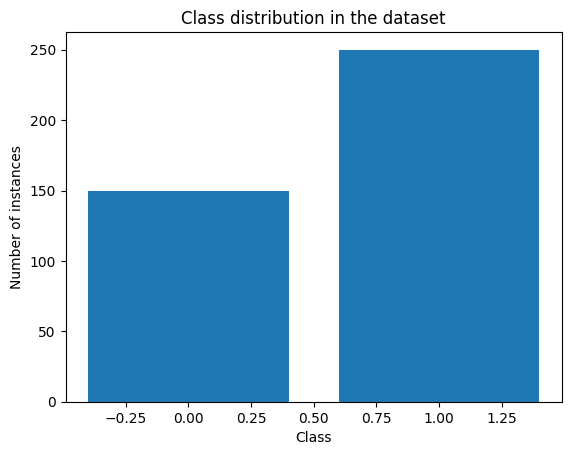

In [ ]:
import matplotlib.pyplot as plt
plt.bar(classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class distribution in the dataset')
plt.show()

In [ ]:
X = data.drop('class', axis=1)
y = data['class']
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print("Original data shape:", X.shape, y.shape)
print("Resampled data shape:", X_smote.shape, y_smote.shape)

Original data shape: (400, 12) (400,)
Resampled data shape: (500, 12) (500,)


In [ ]:
X_smote
type(X_smote)

pandas.core.frame.DataFrame

In [ ]:
data = (X_smote)
df = pd.DataFrame(data)
df

,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe
0,1.020000,1.0,0.0,0.810484,121.000000,1.200000,137.528754,15.400000,44.000000,1.0,1.0,0.0
1,1.020000,4.0,0.0,0.810484,148.036517,0.800000,137.528754,11.300000,38.000000,0.0,0.0,0.0
2,1.010000,2.0,3.0,1.000000,423.000000,1.800000,137.528754,9.600000,31.000000,0.0,1.0,0.0
3,1.005000,4.0,0.0,1.000000,117.000000,3.800000,111.000000,11.200000,32.000000,1.0,0.0,1.0
4,1.010000,2.0,0.0,1.000000,106.000000,1.400000,137.528754,11.600000,35.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.020000,0.0,0.0,1.000000,98.005878,0.920823,139.202351,14.398824,50.000000,0.0,0.0,0.0
496,1.024082,0.0,0.0,1.000000,99.816432,0.989859,142.917841,14.171502,43.183568,0.0,0.0,0.0
497,1.023992,0.0,0.0,1.000000,99.596690,0.979007,141.596690,14.219338,43.201655,0.0,0.0,0.0
498,1.025000,0.0,0.0,1.000000,130.150718,1.109569,146.698565,15.515072,41.000000,0.0,0.0,0.0


In [ ]:
data2 = (y_smote)
df2 = pd.DataFrame(data2)
df2

,class
0,1
1,1
2,1
3,1
4,1
...,...
495,0
496,0
497,0
498,0


In [ ]:
df3=pd.concat([df,df2],axis=1)
df3.head()

,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe,class
0,1.020,1.0,0.0,0.810484,121.000000,1.2,137.528754,15.4,44.0,1.0,1.0,0.0,1
1,1.020,4.0,0.0,0.810484,148.036517,0.8,137.528754,11.3,38.0,0.0,0.0,0.0,1
2,1.010,2.0,3.0,1.000000,423.000000,1.8,137.528754,9.6,31.0,0.0,1.0,0.0,1
3,1.005,4.0,0.0,1.000000,117.000000,3.8,111.000000,11.2,32.0,1.0,0.0,1.0,1
4,1.010,2.0,0.0,1.000000,106.000000,1.4,137.528754,11.6,35.0,0.0,0.0,0.0,1


In [ ]:
sm= df3['class'].unique()
sm_counts = df3['class'].value_counts()
sm_counts

1    250
0    250
Name: class, dtype: int64

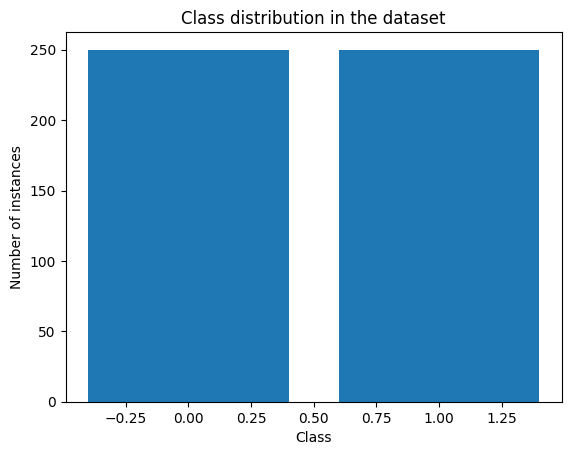

In [ ]:
plt.bar(sm, sm_counts)
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.title('Class distribution in the dataset')
plt.show()

In [ ]:
df3.to_csv("Lasso_smote.csv")

# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [ ]:
dataset = pd.read_csv('Lasso_smote.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = LinearSVC(penalty='l1', dual=False)
svm_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(dual=False, penalty='l1')

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


In [ ]:
#svm with L2 penalty
svm_model1 = LinearSVC(penalty='l2', dual=False)
svm_model1.fit(X_train, y_train)
y_pred = svm_model1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


# **LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('Lasso_smote.csv')

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", round(accuracy*100,2))
print("Precision: ", round(precision*100,2))
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


# **ANN**

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("Lasso_smote.csv")
df.head()

,Unnamed: 0,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe,class
0,0,1.020,1.0,0.0,0.810484,121.000000,1.2,137.528754,15.4,44.0,1.0,1.0,0.0,1
1,1,1.020,4.0,0.0,0.810484,148.036517,0.8,137.528754,11.3,38.0,0.0,0.0,0.0,1
2,2,1.010,2.0,3.0,1.000000,423.000000,1.8,137.528754,9.6,31.0,0.0,1.0,0.0,1
3,3,1.005,4.0,0.0,1.000000,117.000000,3.8,111.000000,11.2,32.0,1.0,0.0,1.0,1
4,4,1.010,2.0,0.0,1.000000,106.000000,1.4,137.528754,11.6,35.0,0.0,0.0,0.0,1


In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns),              kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
model.add(Dense(1, activation="hard_sigmoid"))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=X_train.shape[0])

Epoch 1/50
1/1 [==============================] - 0s 456ms/step - loss: 0.7011 - accuracy: 0.4925
Epoch 2/50
1/1 [==============================] - 0s 12ms/step - loss: 0.6890 - accuracy: 0.5700
Epoch 3/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6772 - accuracy: 0.6950
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6659 - accuracy: 0.7600
Epoch 5/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6550 - accuracy: 0.7975
Epoch 6/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6445 - accuracy: 0.8150
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6342 - accuracy: 0.8275
Epoch 8/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6242 - accuracy: 0.8450
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 0.6144 - accuracy: 0.8525
Epoch 10/50
1/1 [==============================] - 0s 8ms/step - loss: 0.6047 - accuracy: 0.8600
Epoch 11/50
1/1 [===================

In [ ]:
model.save("ckd.model")

In [ ]:
y_pred=model.predict(X_test)


4/4 [==============================] - 0s 2ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)


In [ ]:
for i in y_pred:
  if i<=0.5:
    y_pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  91.0
Precision:  100.0
Recall:  80.43478260869566
F-measure:  89.16
AUC:  90.22
Gini coefficient:  80.43


# **CHAID**

In [ ]:
import pandas as pd
train = pd.read_csv("Lasso_smote.csv")

In [ ]:
import numpy as np
X = train.drop('class', axis=1)
y = train['class']
X = np.array(X)
y = np.array(y)

In [ ]:
import numpy as np

class Node:

    def __init__(self, feature=None, threshold=None, chi2=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.chi2 = chi2
        self.left = left
        self.right = right
        self.value = value

In [ ]:
class DecisionTree:

    def __init__(self, alpha=0.05, min_samples=3,max_depth=7):
        self.alpha = alpha
        self.min_samples = min_samples
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)


    def predict(self, X):
        y_pred = np.apply_along_axis(lambda x: self._traverse_tree(self.tree, x), 1, X)
        return y_pred

    def _traverse_tree(self, node, x):
        if node.feature is None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(node.left, x)
        else:
            return self._traverse_tree(node.right, x)

    def _build_tree(self, X, y):
        if X.shape[0] <= self.min_samples:
            return Node(value=self._get_leaf_value(y))

        # Split the data into two branches
        best_feature, best_threshold, best_chi2 = self._get_best_split(X, y)
        if best_feature is None:
            return Node(value=self._get_leaf_value(y))

        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask])
        right_tree = self._build_tree(X[right_mask], y[right_mask])

        return Node(feature=best_feature, threshold=best_threshold, chi2=best_chi2, left=left_tree, right=right_tree)
    def _get_best_split(self, X, y):
        best = (None, None, 0)
        thresholds_func = lambda sorted_X: (sorted_X[1:] + sorted_X[:-1]) / 2

        for feature in range(X.shape[1]):
            sorted_X = np.sort(X[:, feature])
            thresholds = thresholds_func(sorted_X)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                if left_mask.sum() < self.min_samples or right_mask.sum() < self.min_samples:
                    continue
                chi2 = self._get_chi2(y, left_mask, right_mask)
                if chi2 > best[2]:
                    best = (feature, threshold, chi2)

        return best if best[0] is not None else (None, None, None)


    def _get_chi2(self, y, left_mask, right_mask):
        observed = np.array([
            [np.sum(y[left_mask] == 0), np.sum(y[left_mask] == 1)],
            [np.sum(y[right_mask] == 0), np.sum(y[right_mask] == 1)]
        ])
        expected = np.array([
            [np.sum(left_mask) * np.sum(y == 0), np.sum(left_mask) * np.sum(y == 1)],
            [np.sum(right_mask) * np.sum(y == 0), np.sum(right_mask) * np.sum(y == 1)]
        ]) / y.shape[0]
        chi2 = np.sum((observed - expected) ** 2 / expected)
        return chi2

    def _get_leaf_value(self, y):
        return np.bincount(y).argmax()

In [ ]:
def train_test_split(X, y, test_size=0.3, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffle_indices = np.random.permutation(len(X))
    test_size = int(test_size * len(X))
    test_indices = shuffle_indices[:test_size]
    train_indices = shuffle_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
classifier = DecisionTree()

In [ ]:
classifier.fit(X_train , y_train)

<ipython-input-138-fe3e5a910934>:68: RuntimeWarning: invalid value encountered in true_divide
  chi2 = np.sum((observed - expected) ** 2 / expected)


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
# Calculate TP, FP, FN, TN
TP = np.sum((y_test == 1) & (y_pred == 1))
FP = np.sum((y_test == 0) & (y_pred == 1))
FN = np.sum((y_test == 1) & (y_pred == 0))
TN = np.sum((y_test == 0) & (y_pred == 0))

# Create confusion matrix
confusion_matrix = np.array([[TP, FP], [FN, TN]])
print(confusion_matrix)

# Calculate accuracy, recall, precision, and F-score
accuracy= (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
fscore = 2 * (precision * recall) / (precision + recall)

print("Accuracy",accuracy*100,"%")
print("Recall:", recall)
print("Precision:", precision)
print("F-score:", fscore)

[[76  0]
 [ 0 74]]
Accuracy 100.0 %
Recall: 1.0
Precision: 1.0
F-score: 1.0


# **C5.0**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Import Dataset
d=pd.read_csv('Lasso_smote.csv')
d

,Unnamed: 0,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe,class
0,0,1.020000,1.0,0.0,0.810484,121.000000,1.200000,137.528754,15.400000,44.000000,1.0,1.0,0.0,1
1,1,1.020000,4.0,0.0,0.810484,148.036517,0.800000,137.528754,11.300000,38.000000,0.0,0.0,0.0,1
2,2,1.010000,2.0,3.0,1.000000,423.000000,1.800000,137.528754,9.600000,31.000000,0.0,1.0,0.0,1
3,3,1.005000,4.0,0.0,1.000000,117.000000,3.800000,111.000000,11.200000,32.000000,1.0,0.0,1.0,1
4,4,1.010000,2.0,0.0,1.000000,106.000000,1.400000,137.528754,11.600000,35.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,1.020000,0.0,0.0,1.000000,98.005878,0.920823,139.202351,14.398824,50.000000,0.0,0.0,0.0,0
496,496,1.024082,0.0,0.0,1.000000,99.816432,0.989859,142.917841,14.171502,43.183568,0.0,0.0,0.0,0
497,497,1.023992,0.0,0.0,1.000000,99.596690,0.979007,141.596690,14.219338,43.201655,0.0,0.0,0.0,0
498,498,1.025000,0.0,0.0,1.000000,130.150718,1.109569,146.698565,15.515072,41.000000,0.0,0.0,0.0,0


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   sg          500 non-null    float64
 2   al          500 non-null    float64
 3   su          500 non-null    float64
 4   rbc         500 non-null    float64
 5   bgr         500 non-null    float64
 6   sc          500 non-null    float64
 7   sod         500 non-null    float64
 8   hemo        500 non-null    float64
 9   pcv         500 non-null    float64
 10  htn         500 non-null    float64
 11  dm          500 non-null    float64
 12  pe          500 non-null    float64
 13  class       500 non-null    int64  
dtypes: float64(12), int64(2)
memory usage: 54.8 KB


In [ ]:
d['class'].unique()

array([1, 0])

In [ ]:
d['class'].value_counts()

1    250
0    250
Name: class, dtype: int64

In [ ]:
# Apply Label Encoding
le=LabelEncoder()
d['class']=le.fit_transform(d['class'])
d['class']

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: class, Length: 500, dtype: int64

In [ ]:
d['class'].value_counts()

1    250
0    250
Name: class, dtype: int64

In [ ]:
# Optionally list down column names
col_names=list(d.columns)
col_names

['Unnamed: 0',
 'sg',
 'al',
 'su',
 'rbc',
 'bgr',
 'sc',
 'sod',
 'hemo',
 'pcv',
 'htn',
 'dm',
 'pe',
 'class']

In [ ]:
d.shape

(500, 14)

In [ ]:
x=d.iloc[:,0:12]
x

,Unnamed: 0,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm
0,0,1.020000,1.0,0.0,0.810484,121.000000,1.200000,137.528754,15.400000,44.000000,1.0,1.0
1,1,1.020000,4.0,0.0,0.810484,148.036517,0.800000,137.528754,11.300000,38.000000,0.0,0.0
2,2,1.010000,2.0,3.0,1.000000,423.000000,1.800000,137.528754,9.600000,31.000000,0.0,1.0
3,3,1.005000,4.0,0.0,1.000000,117.000000,3.800000,111.000000,11.200000,32.000000,1.0,0.0
4,4,1.010000,2.0,0.0,1.000000,106.000000,1.400000,137.528754,11.600000,35.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,1.020000,0.0,0.0,1.000000,98.005878,0.920823,139.202351,14.398824,50.000000,0.0,0.0
496,496,1.024082,0.0,0.0,1.000000,99.816432,0.989859,142.917841,14.171502,43.183568,0.0,0.0
497,497,1.023992,0.0,0.0,1.000000,99.596690,0.979007,141.596690,14.219338,43.201655,0.0,0.0
498,498,1.025000,0.0,0.0,1.000000,130.150718,1.109569,146.698565,15.515072,41.000000,0.0,0.0


In [ ]:
y=d['class']
y

0      1
1      1
2      1
3      1
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: class, Length: 500, dtype: int64

In [ ]:
# Splitting data into training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
# C5.0 Entropy - Training the Model
model_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# C5.0 Entropy - Trained Model Accuracy
model_entropy.score(x_train,y_train)

1.0

[Text(0.5, 0.75, 'x[0] <= 249.5\nentropy = 1.0\nsamples = 400\nvalue = [198, 202]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 202\nvalue = [0, 202]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 198\nvalue = [198, 0]')]

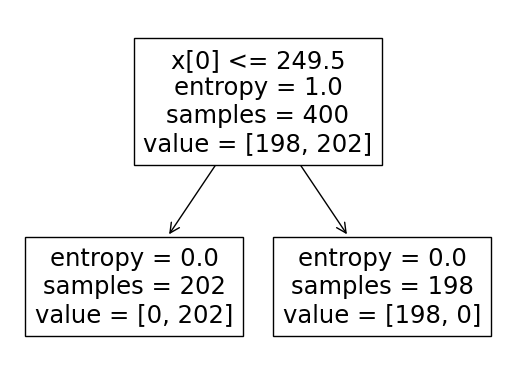

In [ ]:
# Plot the decision tree
tree.plot_tree(model_entropy)

[Text(0.5, 0.75, 'age <= 249.5\nentropy = 1.0\nsamples = 400\nvalue = [198, 202]\nclass = notckd'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 202\nvalue = [0, 202]\nclass = notckd'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 198\nvalue = [198, 0]\nclass = ckd')]

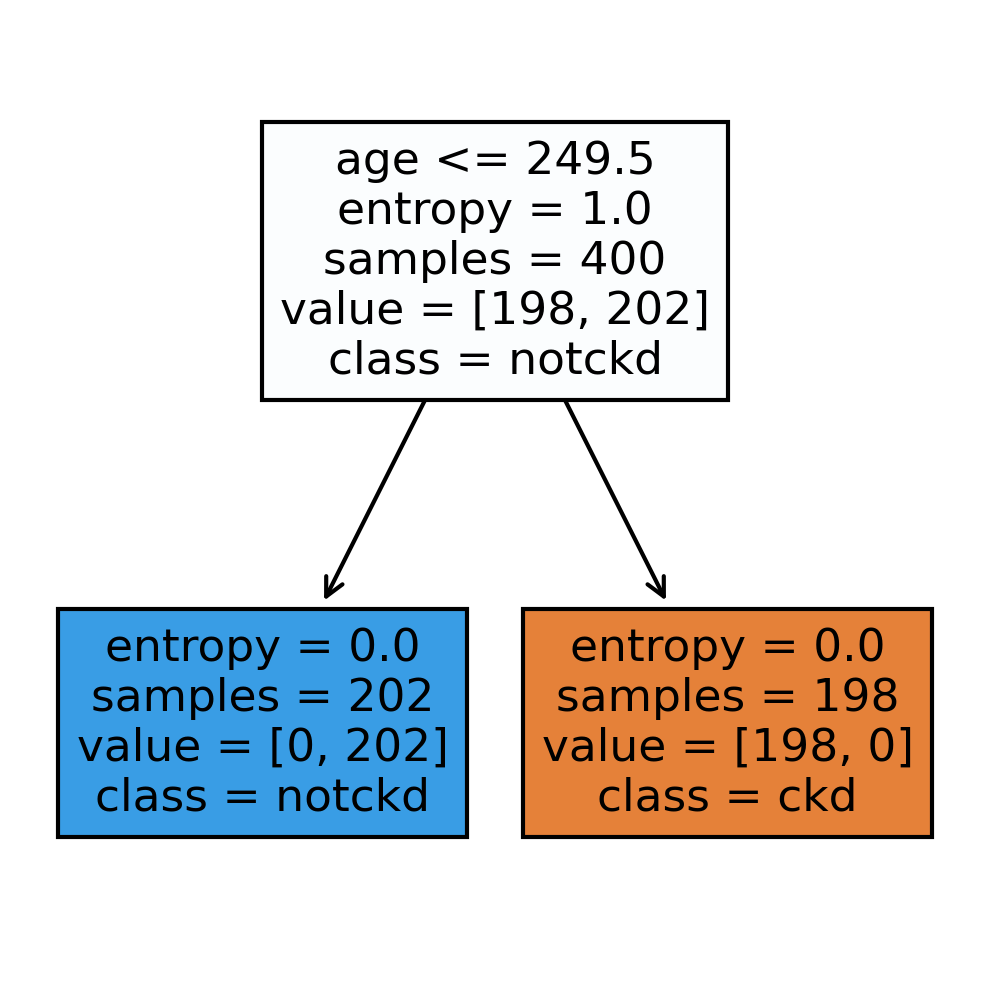

In [ ]:
# For better visualization of Decision Tree
fig=plt.figure(figsize=(4,4),dpi=300)
fn=['age', 'bp', 'sg', 'al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane', 'class']
cn=['ckd', 'notckd']
tree.plot_tree(model_entropy,feature_names=fn,class_names=cn,filled=True)

In [ ]:
# Predicting on test data
pred=model_entropy.predict(x_test)
pred

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
pd.Series(pred).value_counts() # For value_count of array

0    52
1    48
dtype: int64

In [ ]:
y_test.value_counts()

0    52
1    48
Name: class, dtype: int64

In [ ]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,pred)

col_0,0,1
class,,
0,52,0
1,0,48


In [ ]:
# C5.0 Entropy - Test Model Accuracy
acc = model_entropy.score(x_test,y_test)

In [ ]:
print("Accuracy : ",acc*100,'%')

Accuracy :  100.0 %


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred)
f_measure = f1_score(y_test, pred)
auc = roc_auc_score(y_test, pred)
gini_coefficient = 2 * roc_auc_score(y_test, pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  100.0
Precision:  100.0
Recall:  100.0
F-measure:  100.0
AUC:  100.0
Gini coefficient:  100.0


# **KNN**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv("Lasso_smote.csv")
df.head()

,Unnamed: 0,sg,al,su,rbc,bgr,sc,sod,hemo,pcv,htn,dm,pe,class
0,0,1.020,1.0,0.0,0.810484,121.000000,1.2,137.528754,15.4,44.0,1.0,1.0,0.0,1
1,1,1.020,4.0,0.0,0.810484,148.036517,0.8,137.528754,11.3,38.0,0.0,0.0,0.0,1
2,2,1.010,2.0,3.0,1.000000,423.000000,1.8,137.528754,9.6,31.0,0.0,1.0,0.0,1
3,3,1.005,4.0,0.0,1.000000,117.000000,3.8,111.000000,11.2,32.0,1.0,0.0,1.0,1
4,4,1.010,2.0,0.0,1.000000,106.000000,1.4,137.528754,11.6,35.0,0.0,0.0,0.0,1


In [ ]:
df.shape

(500, 14)

In [ ]:
x=df.drop(["class"],axis=1)
y=df["class"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=5,p=2,metric='euclidean')

In [ ]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print(y_pred)

[1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  99.0
Precision:  98.0
Recall:  100.0
F-measure:  98.99
AUC:  99.02
Gini coefficient:  98.04


# **RANDOM TREE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df=pd.read_csv("Lasso_smote.csv")

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [ ]:
tree = DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  99.0
Precision:  98.0
Recall:  100.0
F-measure:  98.99
AUC:  99.02
Gini coefficient:  98.04


# **DEEP LEARNING MODEL**

In [ ]:

from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=pd.read_csv("impckd.csv")
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.810484,1.0,0.0,0.0,121.000000,...,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.810484,1.0,0.0,0.0,148.036517,...,38.0,6000.0,4.707435,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,1.000000,1.0,0.0,0.0,423.000000,...,31.0,7500.0,4.707435,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,1.000000,0.0,1.0,0.0,117.000000,...,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,1.000000,1.0,0.0,0.0,106.000000,...,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1


In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [ ]:
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size= 0.28, random_state=42)

In [ ]:


model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=500,
                    batch_size=X_train.shape[0])

Epoch 1/500
1/1 [==============================] - 1s 600ms/step - loss: 0.6690 - accuracy: 0.6098
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6654 - accuracy: 0.6132
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6617 - accuracy: 0.6132
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6581 - accuracy: 0.6132
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6545 - accuracy: 0.6132
Epoch 6/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6508 - accuracy: 0.6132
Epoch 7/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6472 - accuracy: 0.6132
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.6436 - accuracy: 0.6132
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6399 - accuracy: 0.6132
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6362 - accuracy: 0.6132
Epoch 11/500
1/1 [=======

In [ ]:
model.save("ckd.model")

In [ ]:
y_pred=model.predict(X_test)


4/4 [==============================] - 0s 2ms/step


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)


In [ ]:
for i in y_pred:
  if i<=0.5:
    y_pred[i]=0

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,roc_auc_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
gini_coefficient = 2 * roc_auc_score(y_test, y_pred) - 1
print("Accuracy: ", accuracy*100)
print("Precision: ", precision*100)
print("Recall: ", recall*100)
print("F-measure: ", round(f_measure*100,2))
print("AUC: ", round(auc*100,2))
print("Gini coefficient: ", round(gini_coefficient*100,2))

Accuracy:  99.11504424778761
Precision:  100.0
Recall:  98.64864864864865
F-measure:  99.32
AUC:  99.32
Gini coefficient:  98.65
